# Capstone Project-5
## Domain:
- Marketing for Financial Services
## Title:
- Exploratory Data Analysis and Predictive Modeling for Marketing Term-Deposit Scheme in the Financial Services Industry
## About:
- DB Bank is a large public sector bank that has branches across the cities. It provides various services like savings accounts, current accounts, term deposits, personal loans, home loans, etc. to customers. Whenever the bank conducts marketing on its new schemes, it will keep track of data related to customers’ personal, social, and economic details. Also, it maintains the detailing of efforts made to achieve success in the campaign. Recently, the bank has conducted a campaign to market its term-deposit scheme. Campaigns were conducted based mostly on direct phone calls, soliciting the bank's customers to place  a term deposit. After all the marketing efforts, if the client had agreed to place a deposit, then the campaign is a success, otherwise not (Target variable marked 'yes', or 'no').

## Checkpoint 1

### Importing libraries 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats


### Loading dataset

In [38]:
# Load the data from CSV files
city_master_df = pd.read_csv('City_Master.csv')
customer_details_df = pd.read_csv('Customer_and_bank details_p1.csv')
customer_campaign_df = pd.read_csv('Customer_campaign_details_p1.csv')
customer_postal_code_df = pd.read_csv('Customer_Postal_Code_details.csv')
customer_response_df = pd.read_csv('Customer_Response_data_p1.csv')
customer_social_economic_df = pd.read_csv('Customer_social_economic_data_p1.csv')
region_code_master_df = pd.read_csv('Region_code_master.csv')
state_master_df = pd.read_csv('State_Master.csv')

### Initial Analysis

In [39]:
city_master_df.head()

,City_Code,City_Name,State_Code
0,C1,Henderson,S1
1,C2,Los Angeles,S2
2,C3,Fort Lauderdale,S3
3,C4,Concord,S4
4,C5,Seattle,S5


In [40]:
customer_details_df.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
0,1,56,services,married,high.school,no,no,yes,3,S1,C1
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1
2,3,59,admin.,married,professional.course,no,no,no,4,S2,C2
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3
4,5,24,technician,single,professional.course,no,yes,no,3,S3,C3


In [41]:
customer_campaign_df.head()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,telephone,may,mon,307,1,999,0,nonexistent
1,2,telephone,may,mon,198,1,999,0,nonexistent
2,3,telephone,may,mon,139,1,999,0,nonexistent
3,4,telephone,may,mon,217,1,999,0,nonexistent
4,5,telephone,may,mon,380,1,999,0,nonexistent


In [42]:
customer_postal_code_df.head()

,customer_id,Postal Code
0,1,42420
1,2,42420
2,3,90036
3,4,33311
4,5,33311


In [43]:
customer_response_df.head()

,Customer_id,y
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [44]:
customer_social_economic_df.head()

,Customer_id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1.1,93.994,-36.4,4.857,5191.0
1,2,1.1,93.994,-36.4,4.857,5191.0
2,3,1.1,93.994,-36.4,4.857,5191.0
3,4,1.1,93.994,-36.4,4.857,5191.0
4,5,1.1,93.994,-36.4,4.857,5191.0


In [45]:
region_code_master_df.head()

,Region_Name,Region_Code
0,Central,1
1,East,2
2,South,3
3,West,4
4,North,5


In [46]:
state_master_df.head()

,State_Code,State_Name,Region_Code
0,S1,Kentucky,3
1,S2,California,4
2,S3,Florida,3
3,S4,North Carolina,3
4,S5,Washington,4


Before we start with *data exploration* we might want to merge the dataframes into one or two dataframes. After looking through the csv files we decided to merge the dataframes in the following manner:

In [47]:
# rename customer_id coloumn of customer_postal_code to Customer_id
customer_postal_code_df = customer_postal_code_df.rename(columns={"customer_id":"Customer_id"})
customer_postal_code_df

,Customer_id,Postal Code
0,1,42420
1,2,42420
2,3,90036
3,4,33311
4,5,33311
...,...,...
37079,37080,10009
37080,37081,10011
37081,37082,10009
37082,37083,85254


In [48]:
# merging
merged_customer_df = pd.merge(customer_details_df, customer_campaign_df, on='Customer_id', how='inner')
merged_customer_df = pd.merge(merged_customer_df, customer_postal_code_df, on='Customer_id', how='inner')
merged_customer_df = pd.merge(merged_customer_df, customer_social_economic_df, on='Customer_id', how='inner')
merged_customer_df = pd.merge(merged_customer_df, customer_response_df, on='Customer_id', how='inner')

merged_customer_df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,90036,1.1,93.994,-36.4,4.857,5191.0,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,10011,-1.1,94.767,-50.8,1.028,4963.6,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,85254,-1.1,94.767,-50.8,1.028,4963.6,yes


In [49]:
merged_customer_df.to_csv('merged_customer.csv')  # saving this dataframe in a separate csv file

In [50]:
area_merged_df = pd.merge(state_master_df, region_code_master_df, on='Region_Code', how='left')
area_merged_df = pd.merge(area_merged_df, city_master_df, on='State_Code', how='inner')

area_merged_df

,State_Code,State_Name,Region_Code,Region_Name,City_Code,City_Name
0,S1,Kentucky,3,South,C1,Henderson
1,S1,Kentucky,3,South,C103,Richmond
2,S1,Kentucky,3,South,C160,Florence
3,S1,Kentucky,3,South,C209,Murray
4,S1,Kentucky,3,South,C257,Bowling Green
...,...,...,...,...,...,...
526,S46,Idaho,4,West,C450,Pocatello
527,S46,Idaho,4,West,C461,Caldwell
528,S46,Idaho,4,West,C514,Twin Falls
529,S47,North Dakota,1,Central,C403,Fargo


In [51]:
area_merged_df.to_csv('area_details.csv')

### Data Exploration

In [52]:
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [53]:
# summary of numeric features
merged_customer_df.describe()

,Customer_id,age,duration,campaign,pdays,previous,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,55202.625553,0.082669,93.576076,-40.505183,3.621668,5167.058664
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,32057.300954,1.568997,0.578493,4.622045,1.733972,72.196605
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,1040.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,23223.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,56301.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,90008.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,99301.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [54]:
# summary of non-numeric features
merged_customer_df.describe(include='object')

,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,contact,month,day_of_week,poutcome,y
count,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084,37084
unique,12,4,8,3,3,3,5,49,531,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,4,S2,C21,cellular,may,thu,nonexistent,no
freq,9420,22479,10971,29382,19433,30561,11884,7427,3422,23522,12420,7778,32023,32876


In [55]:
merged_customer_df.shape

(37084, 26)

In [56]:
merged_customer_df[merged_customer_df.duplicated()].sum()

Customer_id         0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
Region_Code         0
State_Code          0
City_Code           0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
Postal Code         0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                   0
dtype: object

So we are dealing with a dataset that has 26 total features

### Data Cleaning

#### Dealing with missing values

In [57]:
merged_customer_df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,Postal Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,42420,1.1,93.994,-36.4,4.857,5191.0,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,90036,1.1,93.994,-36.4,4.857,5191.0,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,33311,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,10011,-1.1,94.767,-50.8,1.028,4963.6,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,10009,-1.1,94.767,-50.8,1.028,4963.6,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,85254,-1.1,94.767,-50.8,1.028,4963.6,yes


In [58]:
# direct checking of null values
merged_customer_df.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Postal Code       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [59]:
# checking for a second time just to be sure
columns = merged_customer_df.columns

unknown_columns = []
for column in columns:
    unknown_count = (merged_customer_df[column] == 'unknown').sum()
    print(column, unknown_count)
    if unknown_count > 0:
        unknown_columns.append(column)


Customer_id 0
age 0
job 306
marital 72
education 1549
default 7700
housing 882
loan 882
Region_Code 0
State_Code 0
City_Code 0
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
Postal Code 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


In [60]:
# these are our columns with unknown variables for which we need to impute them
unknown_columns

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [61]:
def missing(data, unknown_value='unknown'):
    total = (data == unknown_value).sum().sort_values(ascending=False)
    percent = ((data == unknown_value).sum() / data.shape[0] * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing(merged_customer_df)

,Total,Percent
default,7700,20.763672
education,1549,4.177004
housing,882,2.378384
loan,882,2.378384
job,306,0.825154
marital,72,0.194154
Customer_id,0,0.000000
pdays,0,0.000000
nr.employed,0,0.000000
euribor3m,0,0.000000


In [62]:
# for the rest of the columns we impute the data using the median
for column in unknown_columns:
    mode = merged_customer_df[column].mode()
    merged_customer_df[column].replace(to_replace=['unknown'], value=mode, inplace=True)
missing(merged_customer_df)

,Total,Percent
Customer_id,0,0.0
age,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
Postal Code,0,0.0
poutcome,0,0.0
previous,0,0.0


#### Dealing with outliers

In [63]:
# looking for outliers in our numeric data
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [64]:
numeric_columns = merged_customer_df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Customer_id', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'Postal Code', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

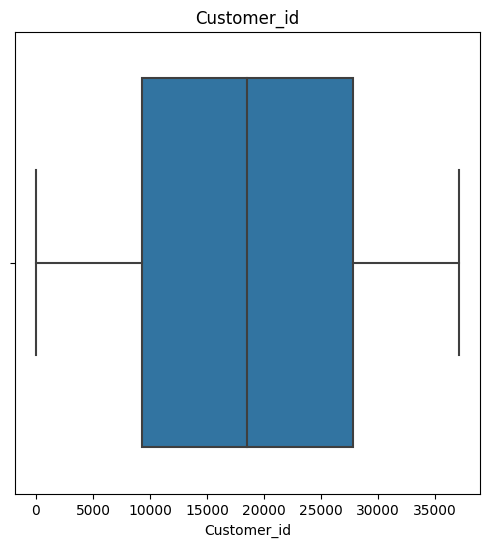

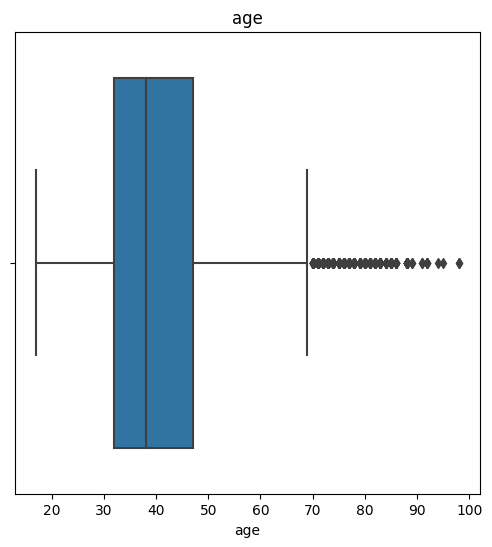

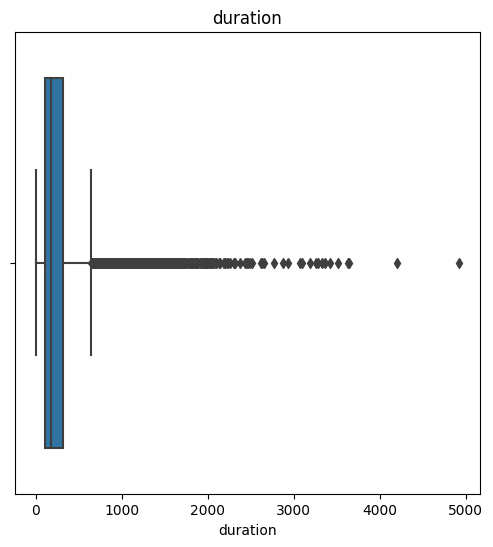

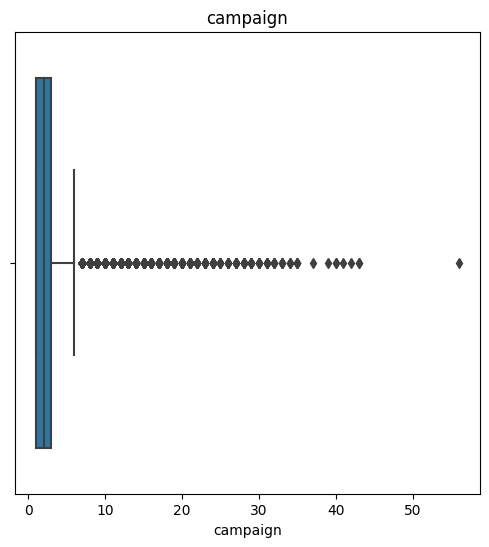

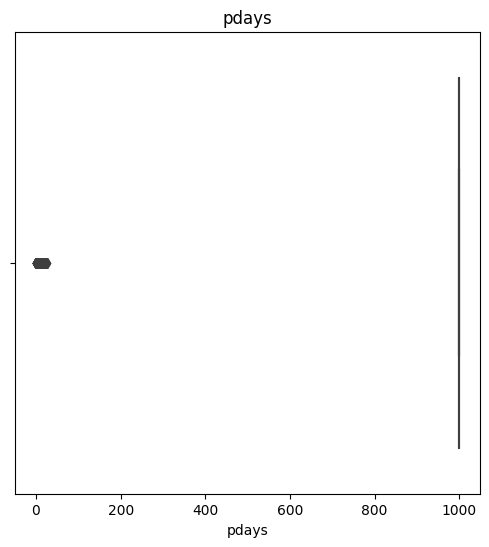

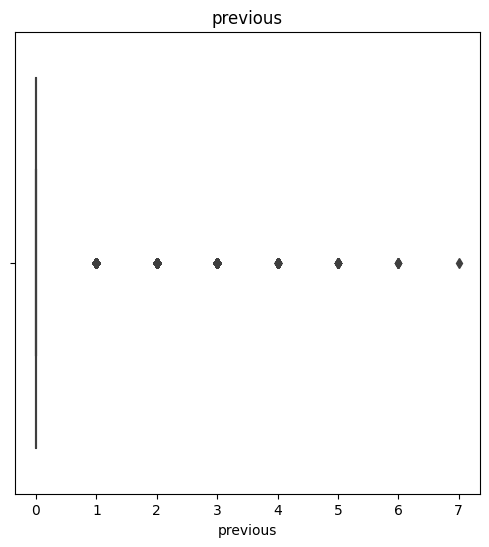

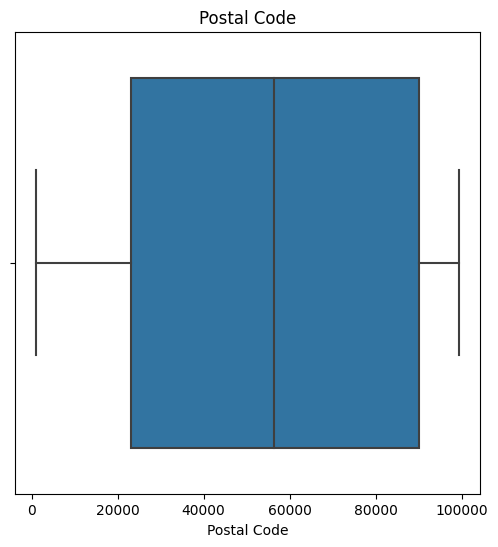

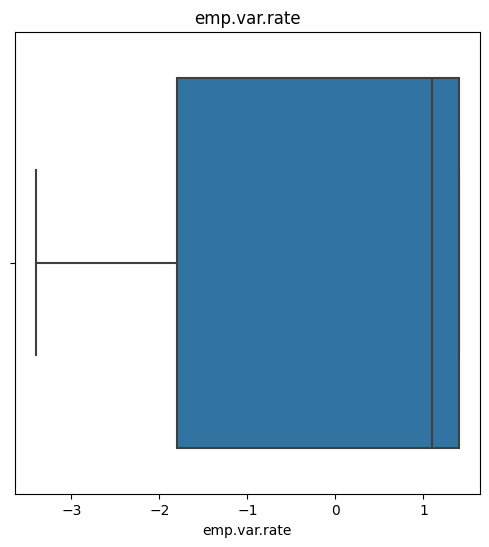

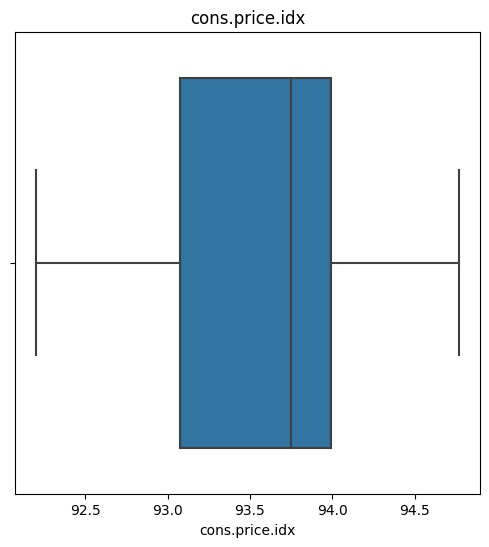

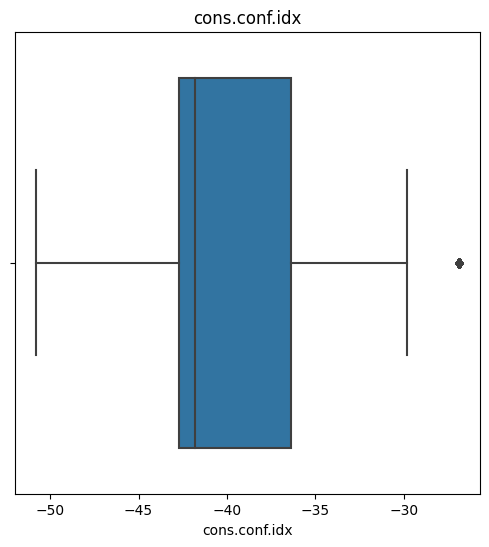

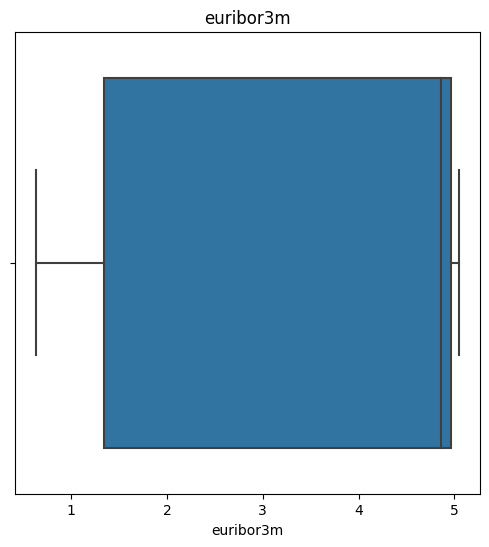

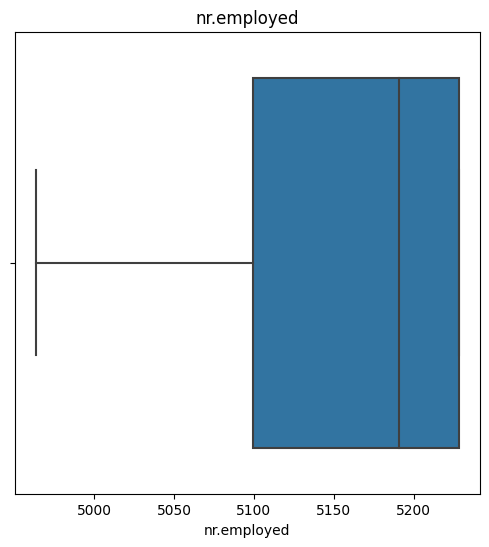

In [65]:
# visualizing outliers for the columns
for column in numeric_columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=merged_customer_df[column])
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.show()

In [66]:
# from eyeballing, we make a list of the columns that contain an outlier
outlier_columns = ['age', 'campaign', 'duration']

In [67]:
# Remove outliers using IQR method
for column in outlier_columns:
    Q1 = merged_customer_df[column].quantile(0.25)
    Q3 = merged_customer_df[column].quantile(0.75)
    IQR = Q3 - Q1
    merged_customer_df = merged_customer_df[(merged_customer_df[column] > Q1 - 1.5 * IQR) & (merged_customer_df[column] < Q3 + 1.5 * IQR)]

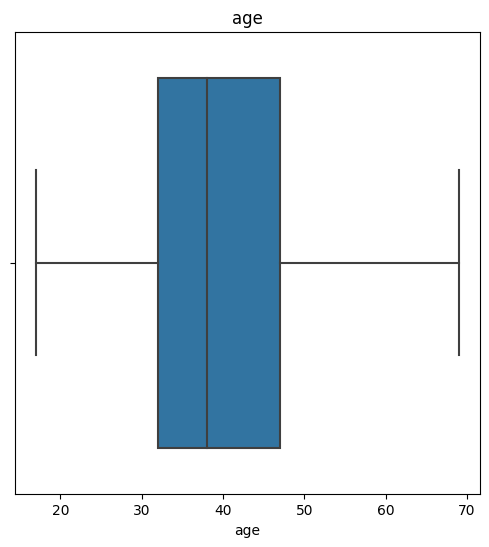

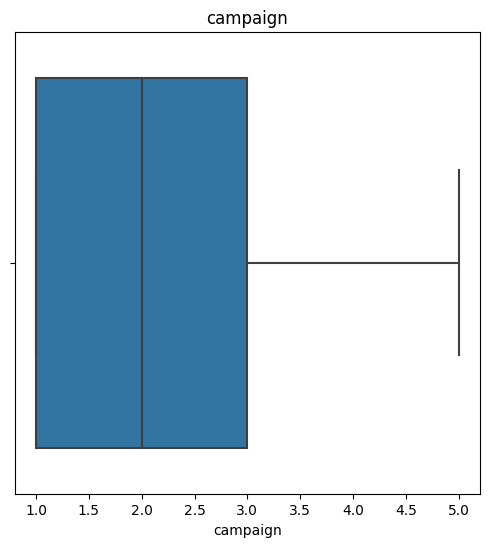

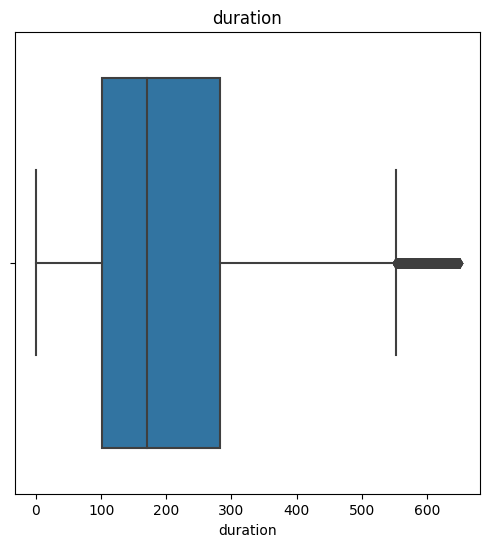

In [68]:
for column in outlier_columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=merged_customer_df[column])
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.show()